In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### MNIST dataset

Cargamos uno de los datasates considerados el Hello World del mundo de la inteligencia artificial

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Observemos los labels

In [3]:
y_train[0]

5

Observemos la dimensión de la data

In [4]:
print('Tamaño del conjunto de entrenamiento: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Tamaño del conjunto de test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Tamaño del conjunto de entrenamiento: X=(60000, 28, 28), y=(60000,)
Tamaño del conjunto de test: X=(10000, 28, 28), y=(10000,)


Observemos algunas imágenes de entrenamiento

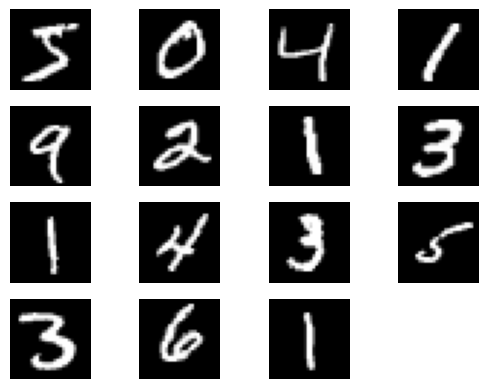

In [5]:
# Número de imagenes que queremos observar
N = 15

# Número de columnas
columns = 4

# Filas
rows = math.ceil(N / columns)

# Loop sobre N imagenes
for i in range(N):
    # Definimos un subplot
    # Los índices de los subplots empiezan en 1, no en 0
    pyplot.subplot(rows, columns, i + 1)
    # Plot de los pixeles de la imagen en escala de grises
    pyplot.imshow(x_train[i], cmap='gray')
    # Opcional: Desactivar los ejes
    pyplot.axis('off')

# Mostramos la figura
pyplot.show()

In [6]:
type(x_train)

numpy.ndarray

In [9]:
np.unique(x_train[0,:,:])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

### Normalizamos la data

Recordamos que la normalización facilita la convergencia del Gradiente Descendiente y evita la saturación de las funciones de activación sigmoide o tangente hiperbólica.

In [10]:
x_train = x_train/ 255.0,
x_test = x_test/ 255.0

### Entrenamos el modelo

Antes de elegir la métrica nos cercioramos de que los datos están balanceados

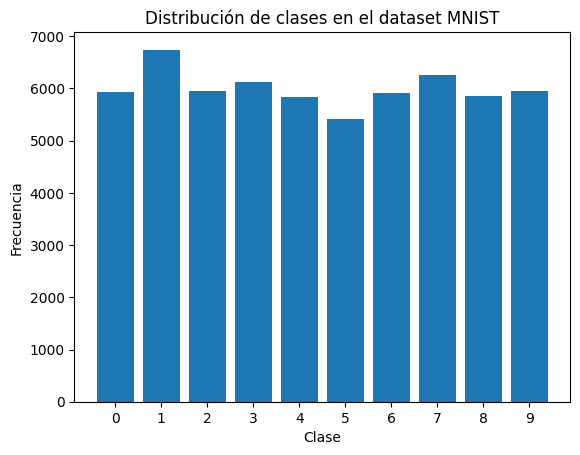

In [ ]:
# Contar la ocurrencia de cada clase
clases, counts = np.unique(y_train, return_counts=True)

# Graficar las clases vs sus frecuencias
plt.bar(clases, counts)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de clases en el dataset MNIST')
plt.xticks(clases)
plt.show()

La clase 1 esta sobre representada en relación a las demas y la 5 sub poblada. 

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# El modelo considera tres estructuras una capa de entrada una capa oculta (Densa o Linear con activacion sigmoide)
# y otra de salida Densa con activación softmax.

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128,activation ='sigmoid'),
    tf.keras.layers.Dense(10,activation = 'softmax')])

# Escogemos un optimizador de gradiente estocástico y una fución de pérdida 
# sparse categorical crossentropy (usa de forma directa los labels)
model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

Vemos el summary del modelo

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos

In [ ]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
 185/1875 [=>............................] - ETA: 0s - loss: 2.1940 - sparse_categorical_accuracy: 0.3235 

/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 1s 637us/step - loss: 1.4119 - sparse_categorical_accuracy: 0.7066 - val_loss: 0.8455 - val_sparse_categorical_accuracy: 0.8367
Epoch 2/10
1875/1875 [==============================] - 1s 602us/step - loss: 0.6904 - sparse_categorical_accuracy: 0.8494 - val_loss: 0.5565 - val_sparse_categorical_accuracy: 0.8739
Epoch 3/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.5192 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.4569 - val_sparse_categorical_accuracy: 0.8866
Epoch 4/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.4468 - sparse_categorical_accuracy: 0.8848 - val_loss: 0.4048 - val_sparse_categorical_accuracy: 0.8935
Epoch 5/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.4061 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.3751 - val_sparse_categorical_accuracy: 0.8988
Epoch 6/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.3797 - spar

Observando como se comporta nuestro modelo

In [ ]:
from PIL import ImageOps

In [ ]:
#def predict_digit(img):
    # # Convert to grayscale and resize the image to 28x28 pixels (MNIST format)
    # img = img.convert('L')
    # img = ImageOps.invert(img)
    # img = img.resize((28, 28))
    
    # # Convert the image to a numpy array and normalize the pixel values
    # img_arr = np.array(img) / 255.0
    
    # # Reshape the array for the model
    # img_arr = img_arr.reshape((1, 28, 28))
    
    # # Make the prediction
    # prediction = model.predict(img_arr)
    
    # # Return the prediction
    # return {str(i): float(prediction[0][i]) for i in range(10)}

In [ ]:
testing = np.array([x_test[0]])
target = y_test[0]

print("input shape: ", testing.shape)
print("Target class: ", target)

input shape:  (1, 28, 28)
Target class:  7


In [ ]:
# Make the prediction
prediction = model.predict(testing)

# vectors
print("Proababilities: ", prediction)

1/1 [==============================] - 0s 21ms/step
Proababilities:  [[1.12178415e-04 2.14451893e-06 1.00940015e-04 1.26581802e-03
  9.69385019e-06 1.22982834e-04 3.54929369e-07 9.95833397e-01
  2.42215610e-05 2.52826395e-03]]


In [ ]:
# Decode the prediction to get the class with the highest probability....axis = 0 (filas)....axis = 1 (columnas)
predicted_class = np.argmax(prediction, axis=1)

In [ ]:
# Return the prediction
print("Predicted class: ", predicted_class)

Predicted class:  [7]
